## HANDS OF DATA ANALISYS WITH PANDAS

Script By Rikardoroa - Just python it!

Chapter Two - Creating and Filtering DataFrames and Series

In [13]:
#script by rikardoroa
#just python it!
from abc import ABCMeta,abstractmethod
import pandas as pd
import seaborn as sns
import numpy as np
from urllib.request import Request, urlopen  
import re
import matplotlib.pyplot as plt


class pandas_transformations():
    
    #inicializating variables
    def __init__(self, df = pd.DataFrame(),df_ = pd.DataFrame(),df___ = pd.DataFrame()):
        self.__df = df
        self.__df_= df_
        self.__df___=df___
    
    
    #function decorator for plotting
    def bar_plot(function):
        def plot(*args,**kwargs):
            obj = function(*args,**kwargs)
            fig, ax = plt.subplots(figsize=(15,10))
            ax = sns.barplot(data=obj[0], x=obj[1], y=obj[2], hue=obj[3])
            ax.legend(loc='lower right',prop={'size': 8})
            for container in ax.containers:
                ax.bar_label(container,labels=[f'{p.get_height():,}' for p in container])
            return plt.show()
        return plot
    
    
    #get data from github url repo
    def get_data(self):
        url = 'https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_02/data/earthquakes.csv'
        request = Request(url)
        data = urlopen(request,timeout=30)
        self.__df = pd.read_csv(data)
        return self.__df.head()
    
    #filtering earthquakes magnitud > 5
    def filter_mag(self):
        self.__df_ = self.__df.loc[self.__df['mag']>=5,['mag','place']]
        return self.__df_.head()
    
    #transform operation for getting the country in the Dataset
    @bar_plot
    def plotting_data(self):
        df2 = self.__df_.reset_index(drop=True)
        Country = list(map(lambda x : [item[-1] for item in [item.split(',') for item in df2.place]],df2))[0]
        df3 = pd.DataFrame(Country).rename(columns={0:'Country'}).reset_index(drop=True)
        df2['Country'] = df3[['Country']]
        df2['mag'] = df2[['mag']].astype(float)
        df2  = df2.sort_values(by=['mag'],ascending=False).head(10).reset_index(drop=True)
        self.__df___ = df2
        return df2, df2.Country,df2.mag,df2.place
        
    
    #transform operation for getting the KM for the country in the Dataset
    @bar_plot
    def plotting_kilometers(self):
        df2 = self.__df___.reset_index(drop=True)
        digits = list(map(lambda x : [x.replace(",","") for x in [(",").join(x) for x in[re.findall(r'\d',x) for x in df2.place.values]]],df2))[0]
        df3 = pd.DataFrame(digits).rename(columns={0:'Km'}).reset_index(drop=True)
        df3['Km'] = df3[['Km']].astype(int)
        df2['Km'] = df3[['Km']]
        return df2, df2.Km ,df2.mag,df2.Country

    


In [14]:
Transformations = pandas_transformations()

In [15]:
Transformations.get_data()

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.008693,NaN,85.0,",ci37389218,",1.35,ml,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
1,NaN,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.020030,NaN,79.0,",ci37389202,",1.29,ml,...,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...
2,NaN,4.4,37389194,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.021370,28.0,21.0,",ci37389194,",3.42,ml,...,",ci,",automatic,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0,1539536756176,https://earthquake.usgs.gov/earthquakes/eventp...
3,NaN,NaN,37389186,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.026180,NaN,39.0,",ci37389186,",0.44,ml,...,",ci,",automatic,1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475196167,https://earthquake.usgs.gov/earthquakes/eventp...
4,NaN,NaN,73096941,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.077990,NaN,192.0,",nc73096941,",2.16,md,...,",nc,",automatic,1539474716050,"M 2.2 - 10km NW of Avenal, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1539477547926,https://earthquake.usgs.gov/earthquakes/eventp...


In [16]:
Transformations.filter_mag()

,mag,place
36,5.0,"165km NNW of Flying Fish Cove, Christmas Island"
118,6.7,"262km NW of Ozernovskiy, Russia"
180,5.2,"25km E of Bitung, Indonesia"
226,5.7,"42km WNW of Sola, Vanuatu"
227,5.2,"15km WSW of Pisco, Peru"


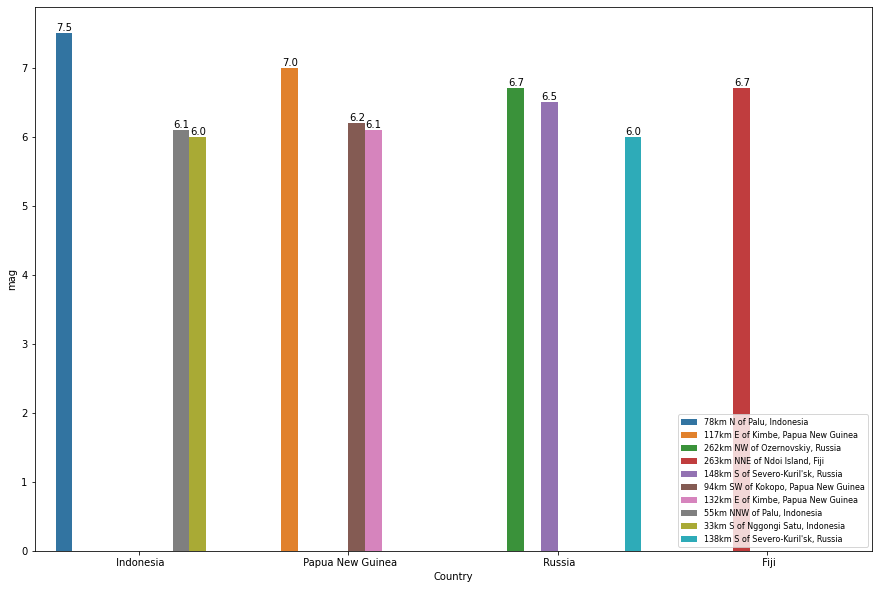

In [17]:
Transformations.plotting_data()

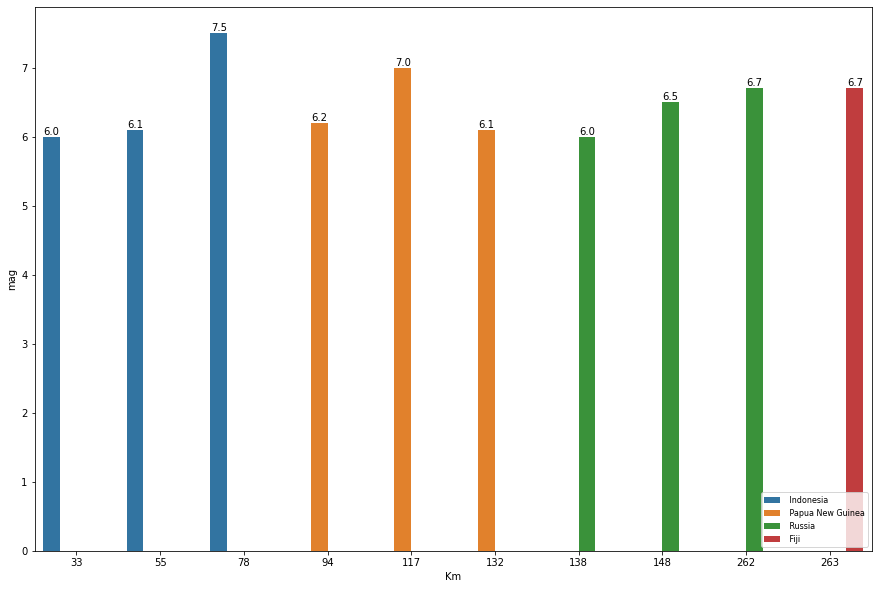

In [18]:
Transformations.plotting_kilometers()